<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/Clustering_extraindo_padr%C3%B5es_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [50]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv')
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
dataframe.fillna(dataframe.median(), inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [51]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)
y_pred

array([1, 0, 1, ..., 1, 1, 4], dtype=int32)

In [53]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
silhouette

0.3485292820452357

In [54]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.1527134855876944

In [55]:
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3422.838208337746

In [56]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [57]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.309607364008843 3526.4405199082735


In [58]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36454479258047573 1.076046490609319 3431.790347716922


In [59]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.24794281752725805 1.2112960490952471 1615.5152475659643


In [60]:
valores = np.array([clustering_algorithm(i, values) for i in range(2, 15)])

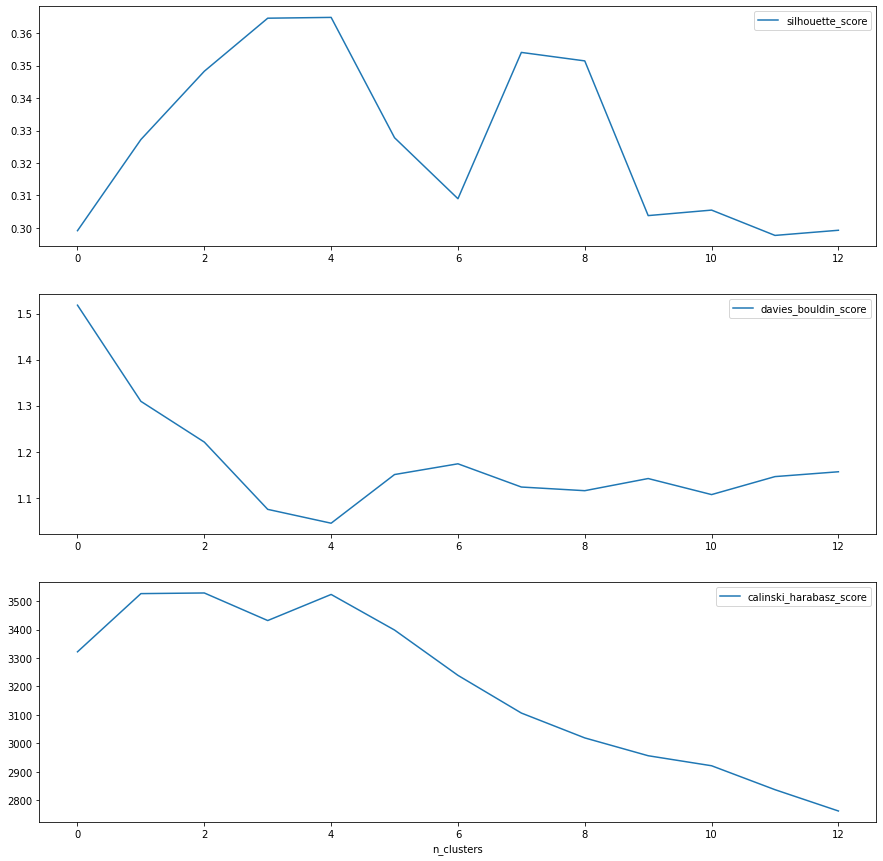

In [61]:
plt.figure(figsize=(15,15))
plt.subplot(3, 1, 1)
plt.plot(valores[:,0], label='silhouette_score')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(valores[:,1], label='davies_bouldin_score')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(valores[:,2], label='calinski_harabasz_score')
plt.xlabel('n_clusters')

plt.legend();

In [129]:
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039454453611787565 3.5468608561319357 302.8378101153035
0.35416642754504835 1.1382306445993164 1194.9519865048883


In [130]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
print(s1, dbs1, calinski1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
print(s2, dbs2, calinski2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s3, dbs3, calinski3)

0.36860891867648515 1.0563346979449357 1204.111582769171
0.3538037064965953 1.1394936582652306 1194.948634553892
0.3670355256183802 1.0993767580167497 1167.531382836454


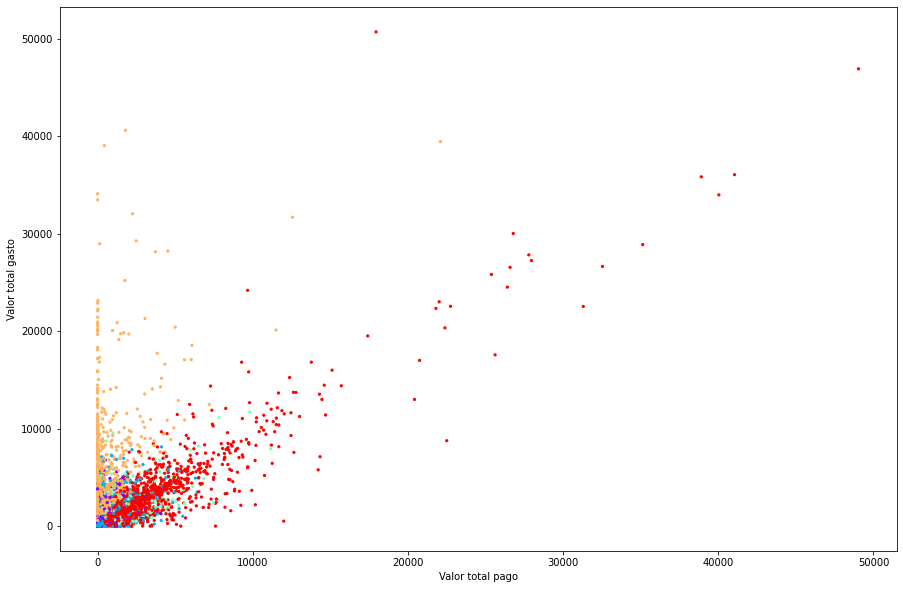

In [131]:
plt.figure(figsize=(15,10))
plt.scatter(dataframe.PURCHASES, dataframe.PAYMENTS, c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto');

In [132]:
dataframe['cluster'] = labels

In [133]:
dataframe.groupby('cluster').describe().T

cluster                           0            1  ...            3            4
BALANCE          count  1315.000000  3311.000000  ...  1001.000000  1498.000000
                 mean   2719.616192   488.867396  ...  1748.854674  1117.171407
                 std    2230.337145   936.898299  ...  1987.975020  1625.342446
                 min       1.691842     0.000000  ...     0.000000     0.000000
                 25%    1035.647960    24.007416  ...   486.170360   211.969615
...                             ...          ...  ...          ...          ...
PRC_FULL_PAYMENT min       0.000000     0.000000  ...     0.000000     0.000000
                 25%       0.000000     0.000000  ...     0.000000     0.000000
                 50%       0.000000     0.000000  ...     0.083333     0.083333
                 75%       0.000000     0.436507  ...     0.166667     0.567461
                 max       0.600000     1.000000  ...     1.000000     1.000000

[128 rows x 5 columns]

In [134]:
centroids = kmeans.cluster_centers_
centroids

array([[3.92487569e-01, 2.21860804e-04, 4.09098804e-02, 2.41007933e-02,
        1.68131725e-02, 4.69520034e-01, 4.57363938e-05, 1.59983052e-05,
        3.02438944e-05, 7.73988118e-05, 1.73779582e-03, 7.90105978e-04,
        7.16382232e-01, 1.49404205e-01, 1.32351222e-01, 2.04165312e-06],
       [7.41256976e-02, 2.30562257e-04, 1.22384952e-01, 4.90559177e-02,
        7.34297204e-02, 2.02256210e-02, 1.72049266e-04, 3.40191371e-05,
        1.39349370e-04, 7.57499670e-06, 1.18862126e-04, 2.86787207e-03,
        9.43224328e-01, 1.54777074e-01, 5.72195798e-02, 7.55204087e-05],
       [5.34687210e-01, 3.07650208e-04, 9.40629597e-02, 4.50945616e-02,
        4.90836013e-02, 8.40386909e-02, 1.03622694e-04, 3.29090827e-05,
        7.70582927e-05, 3.86156491e-05, 6.69712678e-04, 2.24253925e-03,
        6.47433252e-01, 1.99966849e-01, 3.11387835e-01, 2.85888844e-07],
       [2.27283461e-01, 2.12919599e-04, 6.90552841e-02, 3.82103280e-02,
        3.08505405e-02, 3.64415621e-01, 5.84848743e-05, 2.247

In [135]:
max = len(centroids[0])
print('Valores da variância:\n')
for i in range(max):
    print(f'{dataframe.columns.values[i]:32} {centroids[:,i].var():.4f}', )

Valores da variância:

BALANCE                          0.0276
BALANCE_FREQUENCY                0.0000
PURCHASES                        0.0218
ONEOFF_PURCHASES                 0.0077
INSTALLMENTS_PURCHASES           0.0037
CASH_ADVANCE                     0.0350
PURCHASES_FREQUENCY              0.0000
ONEOFF_PURCHASES_FREQUENCY       0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY           0.0000
CASH_ADVANCE_TRX                 0.0000
PURCHASES_TRX                    0.0000
CREDIT_LIMIT                     0.0210
PAYMENTS                         0.0348
MINIMUM_PAYMENTS                 0.0078
PRC_FULL_PAYMENT                 0.0000


In [136]:
max = len(centroids[0])
print('Valores da variância acima de 0.009:\n')
for i in range(max):
    if centroids[:,i].var() > 0.009:
        print(f'{dataframe.columns.values[i]:32} {centroids[:,i].var():.4f}', )

Valores da variância acima de 0.009:

BALANCE                          0.0276
PURCHASES                        0.0218
CASH_ADVANCE                     0.0350
CREDIT_LIMIT                     0.0210
PAYMENTS                         0.0348


In [137]:
description = dataframe.groupby('cluster')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS']]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,2719.616192,251.530144,3004.448265,4782.091255,1008.915227,1315
1,488.867396,639.142794,126.249939,5180.291987,827.304607,3311
2,2949.582558,559.479945,573.495675,3730.000000,1050.324877,1825
3,1748.854674,531.250120,3064.439069,3914.956256,4961.223005,1001
4,1117.171407,3323.689626,185.514237,4043.598232,3045.848646,1498


In [138]:
description = dataframe.groupby('cluster')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT']]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,n_clients
cluster,,,,,,,
0,2719.616192,251.530144,3004.448265,4782.091255,1008.915227,0.007450,1315
1,488.867396,639.142794,126.249939,5180.291987,827.304607,0.244968,3311
2,2949.582558,559.479945,573.495675,3730.000000,1050.324877,0.001062,1825
3,1748.854674,531.250120,3064.439069,3914.956256,4961.223005,0.129974,1001
4,1117.171407,3323.689626,185.514237,4043.598232,3045.848646,0.282255,1498


| cluster | BALANCE	                  | PURCHASES	                                | CASH_ADVANCE                 | CREDIT_LIMIT	           | PAYMENTS	                | Avaliação                                                                    |
|:-------:|:-------------------------:|:-----------------------------------------:|:----------------------------:|:-----------------------:|:------------------------:|:----------------------------------------------------------------------------:|
| 0       |                           | Menor valor em compras                    | Valor considerável em saques |                         |                          | compram pouco / bom volume de saque / não são bons pagadores / maior cluster |
| 1       | menores valores em gastos |                                           | Menor valor em saques        | maior limite de crédito | menores pagamentos       | gastam pouco com maior limite de crédito / bons pagadores                    |
| 2       | maiores valores em gastos |                                           |                              | menor limite de crédito |                          | muito gasto com menor limite de crédito / piores pagadores                   |
| 3       |                           |                                           | Maior valor em saques        |                         | maiores pagamentos       | foco no saque / maiores pagamentos / menor cluster / melhores pagadores                          |
| 4       |                           | Maior valor em compras / grande diferença |                              |                         | pagamentos consideráveis | foco em compras / bons pagadores                                         |


In [64]:
dataframe.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')